# Visualization of SVM

# 1. Case of linearly-separable data

In [1]:
import seaborn as sns

Here, we will use the Iris datset which contains 4 features and 3 classes.

Attribute information:

Here, we will use only two features and two classes of the Iris dataset. To do so, let’s first have a look at the correlation among features, so that we can pick those features and classes which guarantee a linearly-separable demo dataset.

In [2]:
iris = sns.load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Separating the input features and the target variable

y = iris.species
X = iris.drop('species',axis=1)

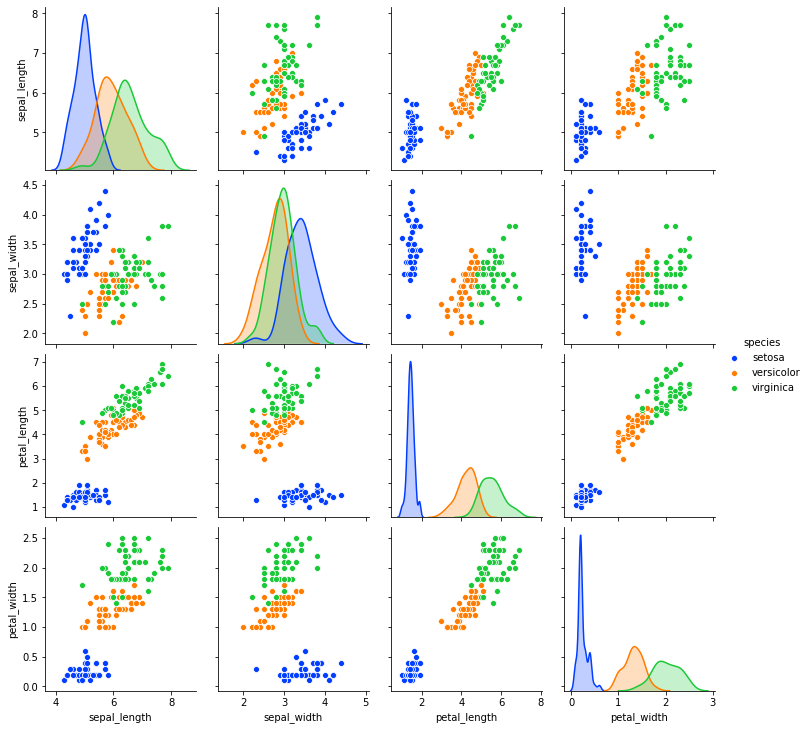

In [4]:
sns.pairplot(iris, hue="species",palette="bright")

We focus on the graph petal_width-petal_length, for the classes Setosa and Versicolor.

In [5]:
df=iris[(iris['species']!='virginica')]
df=df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [6]:
# Converting categorical values to numerical target

df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)

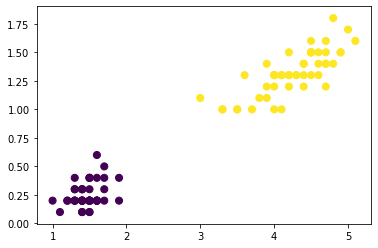

In [9]:
import matplotlib.pyplot as plt

X=df.iloc[:,0:2] # input features - petal_length, petal_width
y=df['species'] # target variable - species
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50)

In [10]:
# Training the algorithm

from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
# Visualizing the coordinates of our Support Vectors

model.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

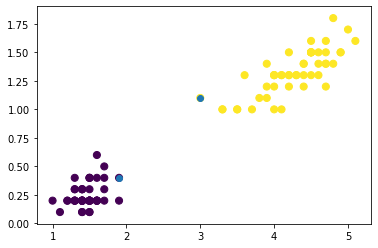

In [12]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50)
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

We can clearly visualize the Support Vectors. 

Now let’s visualize all the elements of our algorithm:

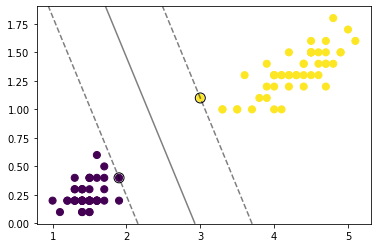

In [15]:
import numpy as np

ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Our algorithm found the hyperplane which maximizes the margin.

# 2. Case of non-linearly-separable data

We will manually generate some non-linearly separable data

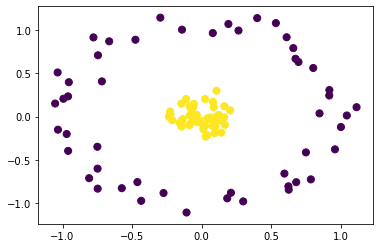

In [17]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

As we can see, data cannot be segregated by a straight line. 

However, if we were able to move from a 2D to a 3D task, we would be able to lift all the yellow points and then use a plan to segregate the two clouds of points.

Text(0.5, 0, 'r')

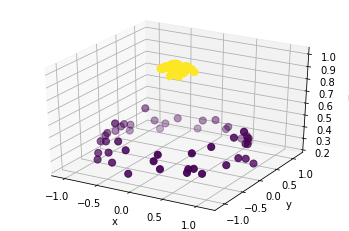

In [21]:
from mpl_toolkits import mplot3d
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

We can see that now the two classes can be separated by a plane.

Here, we will use a radial basis kernel function instead of a linear function that we have used previously.

In [22]:
# Training our model

model=SVC(kernel='rbf').fit(X, y) # rbf - Radial Basis Function

In [25]:
# Coordinates of the Support Vectors

model.support_vectors_

array([[-0.46164645, -0.75515119],
       [ 0.74961536, -0.41304447],
       [ 0.08032488,  0.96320158],
       [ 0.69613584,  0.62992481],
       [ 0.84736604,  0.03729974],
       [-0.71684159,  0.40605025],
       [-0.74946523, -0.34791247],
       [ 0.21058621, -0.87825106],
       [ 0.10672737,  0.29889894],
       [ 0.14128803, -0.18430225],
       [ 0.02943449, -0.23090113],
       [-0.23566406, -0.00238122],
       [-0.22651615,  0.0589663 ]])

As we can see, without making any further computation, but simply changing one parameter of our model, we converted a non-linear problem to a linear one with the help of a kernel trick.